Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing Data files

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('Sample_Submission.csv')

Task 1

In [ ]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [ ]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [ ]:
sub.head()

,0,1
0,0.005016,0.994984
1,0.612204,0.387796
2,0.844945,0.155055
3,0.004671,0.995329
4,0.175931,0.824069


Checking for null values and descriptive statistics

In [ ]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [ ]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [ ]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [ ]:
sub.isnull().sum()

0    0
1    0
dtype: int64

Checking the IsUnderRisk column for how many are under risk and how many are not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


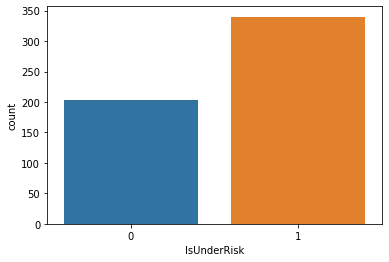

In [ ]:
sns.countplot(train['IsUnderRisk'])
plt.show()

Correlation of columns with target columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


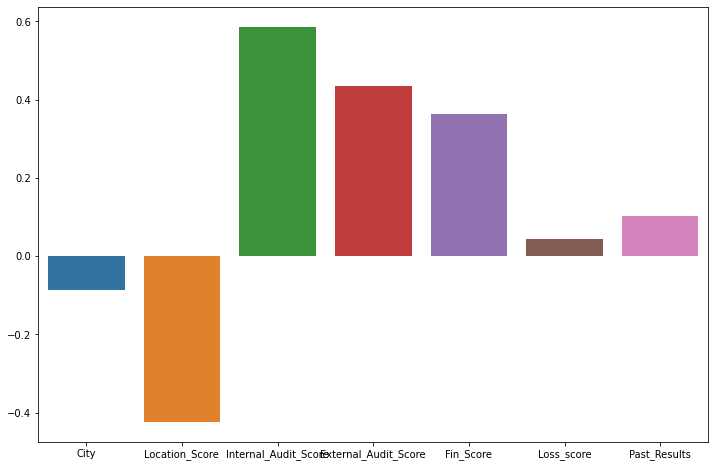

In [ ]:
plt.figure(figsize = (12,8))
datacor = train.drop(['IsUnderRisk'], axis = 1)
sns.barplot(datacor.columns,datacor.corrwith(train['IsUnderRisk']))

Box Plot of CONTINUOUS variables

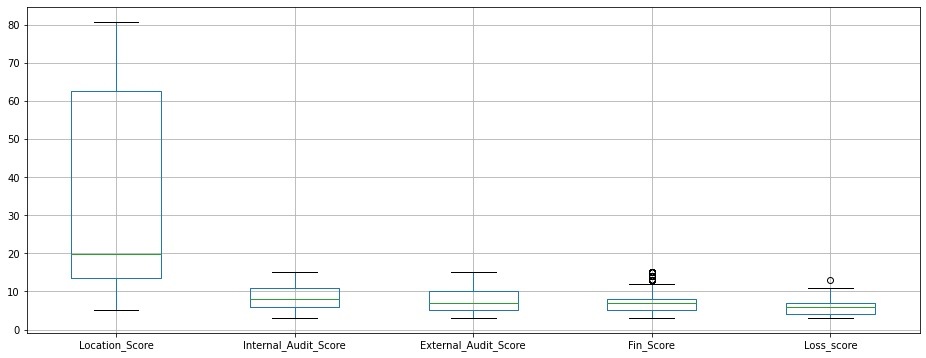

In [ ]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Location_Score', 'Internal_Audit_Score','External_Audit_Score', 'Fin_Score', 'Loss_score'])

 Density Plots Of Continuous Variable

<Figure size 1008x576 with 0 Axes>

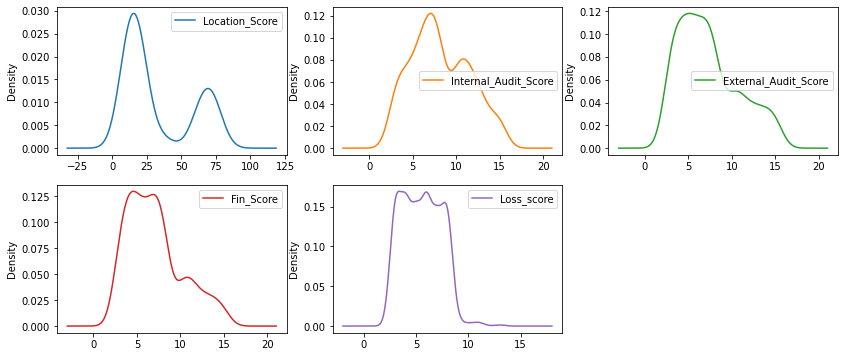

In [ ]:
columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True,layout=(2,3), sharex=False,sharey=False, figsize=(14,6))
plt.show()

Correlation Matrix Plot

[Text(0.5, 0, 'City'),
 Text(1.5, 0, 'Location_Score'),
 Text(2.5, 0, 'Internal_Audit_Score'),
 Text(3.5, 0, 'External_Audit_Score'),
 Text(4.5, 0, 'Fin_Score'),
 Text(5.5, 0, 'Loss_score'),
 Text(6.5, 0, 'Past_Results'),
 Text(7.5, 0, 'IsUnderRisk')]

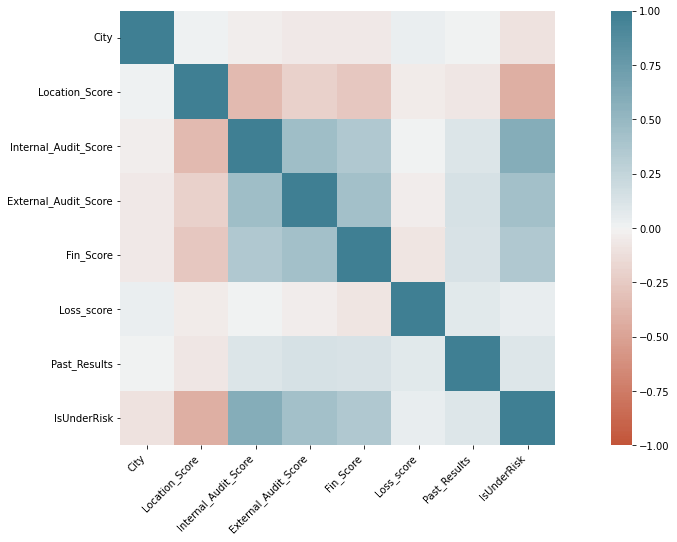

In [ ]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Splitting the data into dependent and independent variables

In [ ]:
X=train.drop('IsUnderRisk',axis='columns')
y=train['IsUnderRisk']

In [ ]:
X.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
clf.score(X_test,y_test)

0.7981651376146789

Task 2 and 3

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006),
              loss='binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 4.9892
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 1.7391
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7780
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6889
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6775
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6208
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5984
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5935
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5724
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5358
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5457
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5285
Epoch 13/50
14/14 [==============================

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4153


0.4152904152870178

In [ ]:
model.predict(X_test)

array([[0.40342322],
       [0.24728963],
       [0.83063436],
       [0.36414796],
       [0.9243779 ],
       [0.6276187 ],
       [0.09477067],
       [0.8240706 ],
       [0.29348674],
       [0.64176077],
       [0.769766  ],
       [0.95098543],
       [0.4332226 ],
       [0.76566875],
       [0.81153905],
       [0.5142697 ],
       [0.40706426],
       [0.7098104 ],
       [0.78358334],
       [0.91391265],
       [0.80764115],
       [0.5711024 ],
       [0.79899514],
       [0.59838974],
       [0.9140306 ],
       [0.2914728 ],
       [0.14604542],
       [0.75406235],
       [0.60030794],
       [0.8123493 ],
       [0.38620877],
       [0.9101294 ],
       [0.93698674],
       [0.4980679 ],
       [0.92523295],
       [0.69147545],
       [0.93396485],
       [0.18756571],
       [0.9537744 ],
       [0.92695355],
       [0.28695086],
       [0.96978915],
       [0.32219505],
       [0.9188458 ],
       [0.5136988 ],
       [0.92942667],
       [0.35588485],
       [0.798

Task 4

In [ ]:
from sklearn.metrics import roc_auc_score

AUC-ROC Score

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9114583333333334

In [ ]:
y_=np.array(y)
y_=y_.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
encoder=OneHotEncoder(sparse=False)
y2=encoder.fit_transform(y_)
y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y2,test_size=0.2)

Task 5

In [ ]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7, )),
                              tf.keras.layers.Dense(3),
                              tf.keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 24        
                                                                 
 dense_19 (Dense)            (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 0s 2ms/step - loss: 2.0685
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8012
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7537
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7110
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7255
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7077
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7085
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7253
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6852
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7512
Epoch 13/50
14/14 [==============================

In [ ]:
y_pred=model2.predict(X_test)

In [ ]:
y_pred

array([[0.3979903 , 0.6020097 ],
       [0.37579963, 0.62420034],
       [0.42252067, 0.5774793 ],
       [0.40512043, 0.5948796 ],
       [0.42911658, 0.57088333],
       [0.35434416, 0.6456559 ],
       [0.34422147, 0.6557786 ],
       [0.35212675, 0.64787334],
       [0.38007337, 0.61992663],
       [0.42066708, 0.5793329 ],
       [0.3991246 , 0.6008754 ],
       [0.37920788, 0.62079215],
       [0.3515417 , 0.6484583 ],
       [0.41644794, 0.583552  ],
       [0.34212235, 0.6578776 ],
       [0.35202056, 0.64797944],
       [0.38881466, 0.6111853 ],
       [0.3673073 , 0.6326927 ],
       [0.4018425 , 0.59815747],
       [0.41467753, 0.58532244],
       [0.35295305, 0.647047  ],
       [0.3849354 , 0.6150646 ],
       [0.39259285, 0.6074071 ],
       [0.36569846, 0.6343016 ],
       [0.39682573, 0.6031742 ],
       [0.34138373, 0.6586163 ],
       [0.33575952, 0.6642405 ],
       [0.4095267 , 0.59047335],
       [0.35770357, 0.6422964 ],
       [0.44154063, 0.55845934],
       [0.

Task 6

In [ ]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6626


0.6625624895095825

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(y_test,y_pred)

0.6502506757548095